In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "./measurements/full-x4"

In [3]:
fechas=['2021-11-19_17-55-37','2021-11-27_16-16-53']
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))
    
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_0-280.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_280-525.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_525-569.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_570-663.csv"))

#REPITO LOS ÚLTIMOS 4 PUNTOS PARA LLENAR EL BACHE. CORRESPONDE A LOS LUGARES 50,51,52,53
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_525-569.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_570-663.csv"))

data.append(pd.read_csv(f"{PATH}/areasfinales/areas_955-990.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_991-1134.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_1180-1200.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_1222-1237.csv"))

In [4]:
data=pd.concat(data)

In [5]:
dt=1/4

long=39

x1= np.arange(0,long/4,dt)
x2=(np.array([1,2,3,4,5,6,7,8,9,10,11,12+4,13+4,14+4,15+4,16+4,17+4,18+4]) + long)/4 #,8,9,10,11, 16,17,18,19,20,21,22,23,24])+long)/4
x3=(np.arange(1,23,1)+long)/4

x=np.concatenate([x1,x2])

In [6]:
len(x)

57

In [7]:
len(data)

61

In [8]:
#LA CONCENTRACION EN 25MIN:

#area1=np.array([data['Area1']])/60
#area2=np.array([data['Area2']])/60
#area3=np.array([data['Area3']])/60
#area4=np.array([data['Area4']])/60

c1=np.array([data['Area1']])/(25*60)
c2=np.array([data['Area2']])/(25*60)
c3=np.array([data['Area3']])/(25*60)
c4=np.array([data['Area4']])/(25*60)

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [9]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(C): #meter el área
    return F *C*6*60* 44 / (den)

#Se le introduce la CONCENTRACIÓN
#Se proyecta que eso emite durante 6h, pero como tiene que estar en minutos, se multiplica por 6*60

In [10]:
gramos1=gramos(c1)#area1))#*14.4
gramos2=gramos(c2)#area2))#*14.4
gramos3=gramos(c3)#area3))#*14.4
gramos4=gramos(c4)#area4))#*14.4

In [11]:
#Gramos acumulados, suponiendo que ese valor se produjo durante 6h
gramos1_ac=np.add.accumulate(gramos1[0])
gramos2_ac=np.add.accumulate(gramos2[0])
gramos3_ac=np.add.accumulate(gramos3[0])
gramos4_ac=np.add.accumulate(gramos4[0])

In [12]:
gramos1_ac[49:55]

array([39.12845718, 39.75388771, 40.82524598, 41.45200758, 41.96230943,
       42.48173479])

In [13]:
#ELIMINO LOS 4 PUNTOS DEL BACHE, QUE NO SON REALES
gramos1_ac[50],gramos1_ac[51],gramos1_ac[52],gramos1_ac[53]

(39.75388771303649, 40.82524597840635, 41.45200758454537, 41.96230943160524)

In [14]:
gramos1_ac=np.delete(gramos1_ac,[50,51,52,53])
gramos2_ac=np.delete(gramos2_ac,[50,51,52,53])
gramos3_ac=np.delete(gramos3_ac,[50,51,52,53])
gramos4_ac=np.delete(gramos4_ac,[50,51,52,53])

Vemos los errores:
$g= \frac{F CT *44}{22414 * 0.001 * 10^6}$

$\sigma_g ^2 = ( \frac{CT *44}{22414 * 0.001 * 10^6}\sigma_F )^2 + ( \frac{F *44}{22414 * 0.001 * 10^6}\sigma_{CT})^2$

In [15]:
def error(x): #INTRODUCIR LA CONCENTRACIÓN
    sigma_F=0.1
    sigma_A=50 + x*0.05
    A=sigma_F*x*6*60*44/den
    B=sigma_A*F*6*60*44/den
    return (A**2 + B**2)

In [16]:
error_g1=error(c1[0]) #var
error_g2=error(c2[0]) #var
error_g3=error(c3[0]) #var
error_g4=error(c4[0]) #var

In [17]:
error_g1_ac=np.add.accumulate(error_g1)
error_g2_ac=np.add.accumulate(error_g2)
error_g3_ac=np.add.accumulate(error_g3)
error_g4_ac=np.add.accumulate(error_g4)

In [18]:
error_g1_ac=np.delete(error_g1_ac,[50,51,52,53])
error_g2_ac=np.delete(error_g2_ac,[50,51,52,53])
error_g3_ac=np.delete(error_g3_ac,[50,51,52,53])
error_g4_ac=np.delete(error_g4_ac,[50,51,52,53])

Al ser acumulado y sumar siempre el anterior, el error será la suma en cuadratura

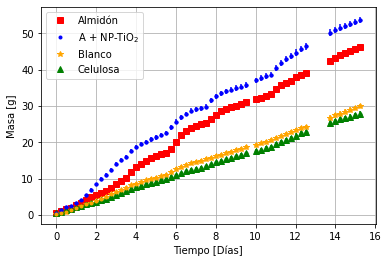

In [19]:
plt.plot(x,gramos1_ac,'s',label='Almidón',color='red')
plt.plot(x,gramos3_ac,'.',label='A + NP-TiO$_2$',color='blue')
plt.plot(x,gramos4_ac,'*',label='Blanco',color='orange')
plt.plot(x,gramos2_ac,'^',label='Celulosa',color='green')

plt.legend()

plt.errorbar(x,gramos1_ac,yerr=error_g1_ac**0.5,fmt='.',color='red')
plt.errorbar(x,gramos2_ac,yerr=error_g2_ac**0.5,fmt='.',color='green')
plt.errorbar(x,gramos3_ac,yerr=error_g3_ac**0.5,fmt='.',color='blue')
plt.errorbar(x,gramos4_ac,yerr=error_g4_ac**0.5,fmt='.',color='orange')

#plt.title('CO2 acumulado - sensor')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion.png")
plt.show()

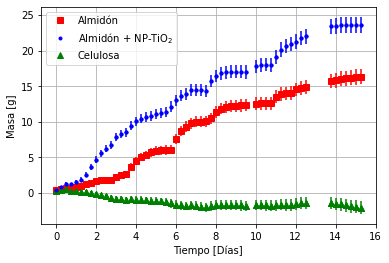

In [20]:
plt.errorbar(x,gramos1_ac-gramos4_ac,yerr=(error_g1_ac+error_g4_ac)**0.5,fmt='.',color='red')
plt.errorbar(x,gramos2_ac-gramos4_ac,yerr=(error_g2_ac+error_g4_ac)**0.5,fmt='^',color='green')
plt.errorbar(x,gramos3_ac-gramos4_ac,yerr=(error_g3_ac+error_g4_ac)**0.5,fmt='.',color='blue')

plt.plot(x,gramos1_ac-gramos4_ac,'s',label='Almidón',color='red')
plt.plot(x,gramos3_ac-gramos4_ac,'.',label='Almidón + NP-TiO$_2$',color='blue')
plt.plot(x,gramos2_ac-gramos4_ac,'^',label='Celulosa',color='green')

plt.legend()

#plt.title('CO2 acumulado - sensor- restado')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion-restado.png")
plt.show()

In [21]:
(gramos3_ac-gramos4_ac)[-1]

23.625244101008306

### Porcentaje de biodeg

Nuestra muestra tiene un 60% de almidón + 20% de glicerol. Entonces la masa es 0.6 $C_6H_{10}O_5$ + 0.2 $C_3H_8O_3$ = 115.6 g/mol, de los cuales, 0.6*6*C + 0.2*3*C=50.4g/mol son carbonos que se convertirían en CO2 ¿cuánto hay en nuestra muestra de 20g? (en verdad, 16.67g, porque son secos)

115.6....50.4

16.67g...X=7.2679

Por tanto, esperamos que hayan 7.2679 g de Carbono en nuestra muestra.

¿cuánto CO2 esperamos que sea convertido? Si cada carbono se transforma en CO2:

12g C ...... 44g CO2

7.2679g C mtra...... X=

In [22]:
#C6H10O5
g_almidon_teo=0.6*(6*12 + 10*1 + 5*16) + 0.2*(3*12+8+3*16)
C=0.6*6*12 + 0.2*3*12
#cada esa cantidad de almidón, hay 6*C=6*12=72 gramos de carbono
#entonces cuánto hay en 20g de muestra:

g_C_mtra=16.67*C/g_almidon_teo

g_CO2_teo=g_C_mtra*44/12

In [23]:
g_CO2_teo

26.64892733564014

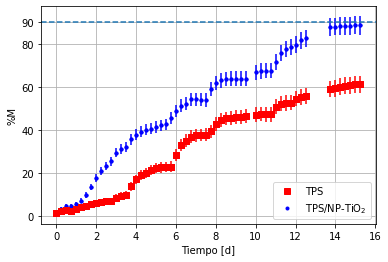

In [29]:
#Grafico el porcentaje de biodeg

plt.errorbar(x,(gramos3_ac-gramos4_ac)*100/g_CO2_teo,yerr=100*(error_g3_ac+error_g4_ac)**0.5 / g_CO2_teo,fmt='.',color='blue')#, label='TPS/NP-TiO$_2$', color='blue')
plt.errorbar(x,(gramos1_ac-gramos4_ac)*100/g_CO2_teo,yerr=100*(error_g1_ac+error_g4_ac)**0.5 / g_CO2_teo,fmt='s',color='red')#, label='TPS' ,color='red')
#plt.errorbar(x,gramos2_ac-gramos4_ac,yerr=(error_g2_ac+error_g4_ac)**0.5,fmt='^',color='green')

plt.plot(x,(gramos1_ac-gramos4_ac)*100/g_CO2_teo,'s',label='TPS',color='red')
plt.plot(x,(gramos3_ac-gramos4_ac)*100/g_CO2_teo,'.',label='TPS/NP-TiO$_2$',color='blue')
#plt.plot(x,(gramos1_ac-gramos4_ac)*100/g_CO2_teo,'s',label='TPS',color='red')
#plt.plot(x,(gramos3_ac-gramos4_ac)*100/g_CO2_teo,'^',label='TPS/NP-TiO$_2$',color='blue')
#plt.plot(x,(gramos2_ac-gramos4_ac)*100/g_CO2_teo,'^',label='Celulosa',color='green')

plt.legend()

#plt.title('CO2 acumulado - sensor- restado')
plt.xlabel('Tiempo [d]')
plt.ylabel('%M')
plt.axhline(90, linestyle='--')
plt.grid(True)
plt.savefig("biodeg_sensor_segunda-medicion-restado.png")
plt.yticks([0,20,40,60,80,90], ['0','20', '40', '60','80','90'])
#plt.axvline(6,ymin=0,ymax=0.5, linestyle='--')
#plt.axhline(49,xmin=0,xmax=6.5/16, linestyle='--')
#plt.axhline(28.5,xmin=0,xmax=6.5/16, linestyle='--')
plt.show()

In [25]:
print(f'El almidón degradó: {(gramos1_ac-gramos4_ac)[-1]*100/g_CO2_teo} +- {100*(error_g1_ac+error_g4_ac)[-1]**0.5 / g_CO2_teo}')
print(f'El almidón+NP-TiO2 degradó: {(gramos3_ac-gramos4_ac)[-1]*100/g_CO2_teo} +- {100*(error_g3_ac+error_g4_ac)[-1]**0.5 / g_CO2_teo}')

El almidón degradó: 61.265885123782155 +- 4.0257141662998785
El almidón+NP-TiO2 degradó: 88.65363998877368 +- 4.259281541785278
